In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./ifood-restaurants-november-2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361447 entries, 0 to 361446
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avatar         361149 non-null  object 
 1   category       361447 non-null  object 
 2   delivery_fee   361447 non-null  float64
 3   delivery_time  361447 non-null  int64  
 4   distance       361447 non-null  float64
 5   name           361447 non-null  object 
 6   price_range    361447 non-null  object 
 7   rating         361447 non-null  float64
 8   url            361447 non-null  object 
 9   lat            361447 non-null  float64
 10  long           361447 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 30.3+ MB


In [3]:
df.sample(5)

,avatar,category,delivery_fee,delivery_time,distance,name,price_range,rating,url,lat,long
85764,https://static-images.ifood.com.br/image/uploa...,Lanches,2.90,30,2.45,Junior Burg's Cozinha Gourmet,CHEAPEST,4.48148,https://www.ifood.com.br/delivery/goiania-go/j...,-16.7198,-49.2469
167934,https://static-images.ifood.com.br/image/uploa...,Pastel,1.99,55,3.15,Lanches Tia Daí,CHEAPEST,4.16667,https://www.ifood.com.br/delivery/itapevi-sp/l...,-23.5235,-46.9407
193107,https://static-images.ifood.com.br/image/uploa...,Lanches,10.00,60,5.21,Supremacia Dog,CHEAPEST,4.00000,https://www.ifood.com.br/delivery/blumenau-sc/...,-26.9155,-49.0709
242800,https://static-images.ifood.com.br/image/uploa...,Brasileira,10.00,80,8.45,Restaurante Kidahora,CHEAPEST,4.16667,https://www.ifood.com.br/delivery/colombo-pr/r...,-25.4195,-49.2646
190042,https://static-images.ifood.com.br/image/uploa...,Brasileira,5.99,50,3.06,Restaurante e Pastelaria Cortez,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/franca-sp/re...,-20.5352,-47.4039


# Frequency

In [4]:
freqCategory = df['category'].value_counts()
freqPrice = df['price_range'].value_counts()

In [5]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
df['clustDist'] = pd.cut(df['distance'], bins=bins, labels=labels, right='False')
freqDist = df['clustDist'].value_counts()
freqDist = freqDist.reindex(labels)

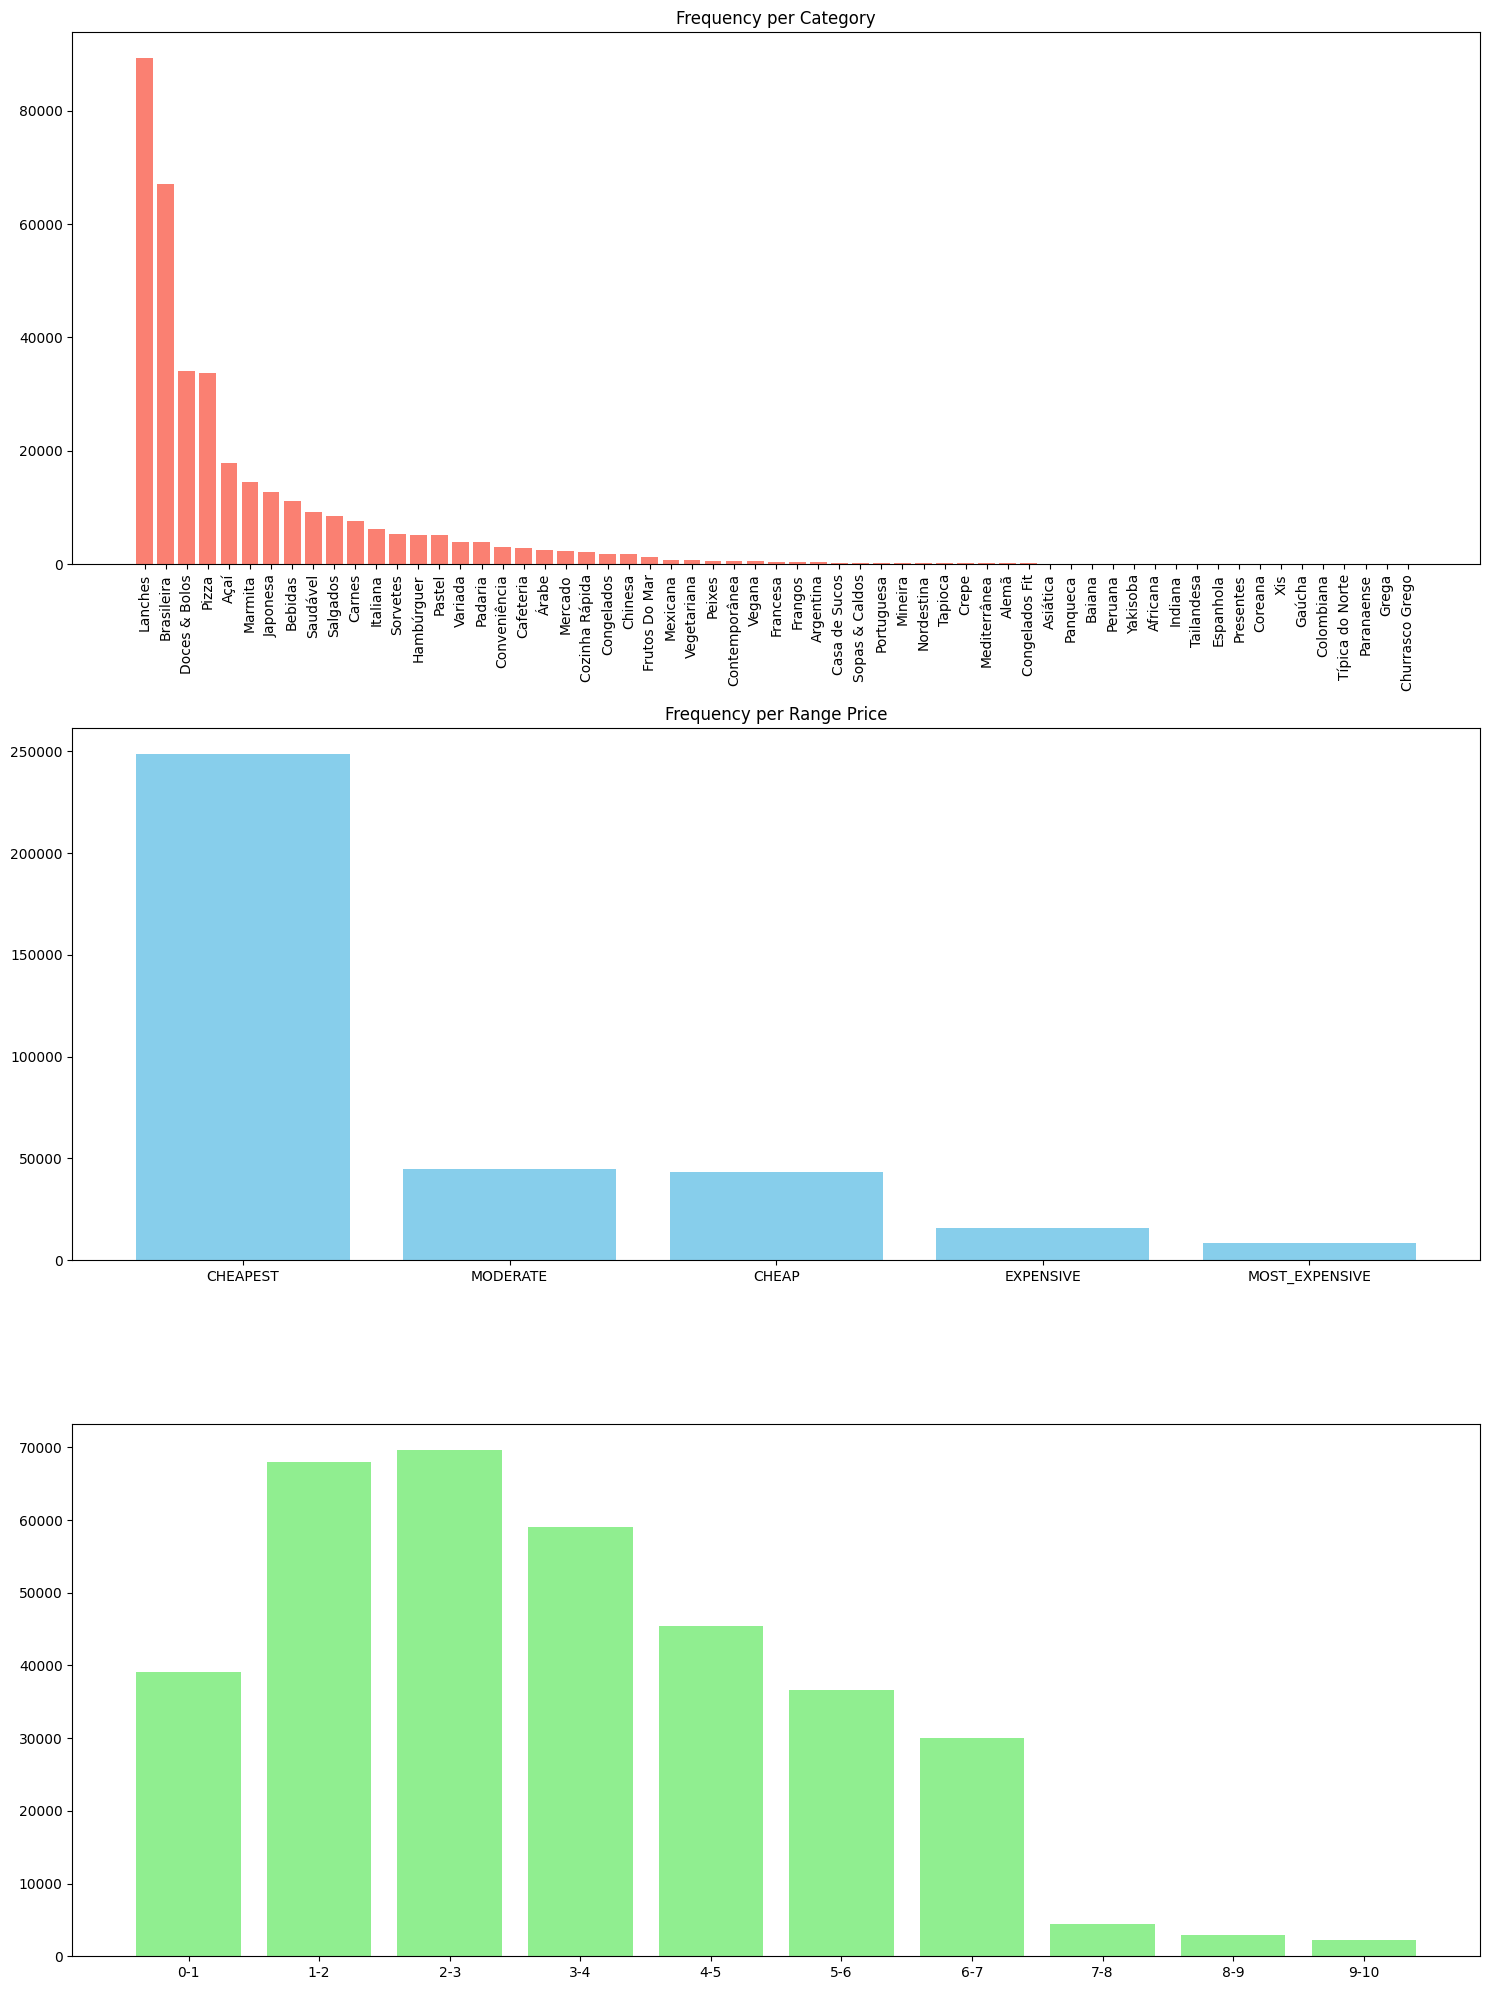

In [6]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
plt.bar(freqCategory.index, freqCategory.values, color='salmon')
plt.title('Frequency per Category')
plt.xticks(rotation=90)
plt.subplot(3, 1, 2)
plt.bar(freqPrice.index, freqPrice.values, color='skyblue')
plt.title('Frequency per Range Price')
plt.subplot(3, 1, 3)
plt.bar(freqDist.index, freqDist.values, color='lightgreen')
plt.tight_layout()

# Measures of Central Tendency

In [7]:
df.columns

Index(['avatar', 'category', 'delivery_fee', 'delivery_time', 'distance',
       'name', 'price_range', 'rating', 'url', 'lat', 'long', 'clustDist'],
      dtype='object')

In [8]:
df = df[['category', 'delivery_fee', 'delivery_time', 'price_range']]

In [9]:
numerical = df.select_dtypes(include=['number']).columns.tolist()
categorical = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print('Numerical Variables: ', numerical)
print('Categorical Variables: ', categorical)

Numerical Variables:  ['delivery_fee', 'delivery_time']
Categorical Variables:  ['category', 'price_range']


In [10]:
df.describe()

,delivery_fee,delivery_time
count,361447.000000,361447.000000
mean,6.450367,47.758629
std,4.062925,19.586370
min,0.000000,-5.000000
25%,4.000000,35.000000
50%,5.990000,45.000000
75%,8.990000,60.000000
max,40.000000,5060.000000


## Mode

In [11]:
print(df['category'].mode())
print(type(df['category'].mode()))

0    Lanches
Name: category, dtype: object
<class 'pandas.core.series.Series'>


In [12]:
df['category'].mode()[0]

'Lanches'

In [13]:
df[categorical].mode()

,category,price_range
0,Lanches,CHEAPEST


In [14]:
df['delivery_fee'].mode()

,delivery_fee
0,0.0


In [15]:
for var in categorical:
  countVar = df[var].value_counts()
  if len(countVar) >= 5:
    print(f'Var {var}')
    print(f'Mode: {df[var].mode()[0]}')
    print('Top 5')
    print(f'{countVar.iloc[:5]}')
  else:
    print(f'Var {var}')
    print(f'Mode: {df[var].mode()[0]}')
    print(f'{countVar}')

Var category
Mode: Lanches
Top 5
category
Lanches          89331
Brasileira       67027
Doces & Bolos    34041
Pizza            33797
Açaí             17837
Name: count, dtype: int64
Var price_range
Mode: CHEAPEST
Top 5
price_range
CHEAPEST          248818
MODERATE           44977
CHEAP              43281
EXPENSIVE          15820
MOST_EXPENSIVE      8551
Name: count, dtype: int64


## Mean

In [16]:
numerical

['delivery_fee', 'delivery_time']

In [17]:
df['delivery_fee'].mean()

np.float64(6.450366637432319)

In [18]:
float(df['delivery_time'].mean())

47.75862851261734

In [19]:
df[numerical].mean()

,0
delivery_fee,6.450367
delivery_time,47.758629


## Median

In [20]:
df[numerical].median()

,0
delivery_fee,5.99
delivery_time,45.00


# Range

In [21]:
for var in numerical:
  print(f'Var {var}')
  print(f'Range: {df[var].max()-df[var].min()}')

Var delivery_fee
Range: 40.0
Var delivery_time
Range: 5065


# Variance and Standard Deviation

In [22]:
df[numerical].var()

,0
delivery_fee,16.507356
delivery_time,383.625905


In [23]:
df[numerical].std()

,0
delivery_fee,4.062925
delivery_time,19.586370


# Outliers

In [24]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
IQR

,0
delivery_fee,4.99
delivery_time,25.00


In [25]:
outliers = df[((df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,category,delivery_fee,delivery_time,price_range
9,Marmita,8.9,120,CHEAPEST
29,Saudável,7.9,120,CHEAP
40,Saudável,20.0,50,CHEAPEST
58,Saudável,0.0,120,CHEAPEST
83,Congelados Fit,7.9,120,CHEAP
...,...,...,...,...
360953,Doces & Bolos,9.0,130,CHEAPEST
361002,Lanches,5.0,120,CHEAPEST
361151,Mercado,10.0,120,CHEAPEST
361287,Conveniência,20.0,75,CHEAPEST


In [26]:
print(f'% Outliers: {np.round(100*(len(outliers)/len(df)),2)} %')

% Outliers: 1.56 %


In [27]:
dfWithoutOutliers = df[~((df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
dfWithoutOutliers.sample(5)

,category,delivery_fee,delivery_time,price_range
217201,Açaí,12.99,48,CHEAPEST
120624,Brasileira,12.99,46,CHEAPEST
6273,Doces & Bolos,6.49,30,CHEAPEST
6515,Lanches,12.99,62,CHEAPEST
119858,Bebidas,11.99,48,MOST_EXPENSIVE


In [29]:
# Saving clean DF
dfWithoutOutliers.to_csv('./ifood-restaurants-november-2020-clean.csv', index=True)

# Boxplot

<ipython-input-30-5d4b83cc6dac>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['delivery_time'], labels=['delivery_time'])


{'whiskers': [<matplotlib.lines.Line2D at 0x78aff82b8250>,
 'caps': [<matplotlib.lines.Line2D at 0x78aff82bb950>,
 'boxes': [<matplotlib.lines.Line2D at 0x78aff82f7390>],
 'medians': [<matplotlib.lines.Line2D at 0x78aff8287050>],
 'fliers': [<matplotlib.lines.Line2D at 0x78aff826f690>],
 'means': []}

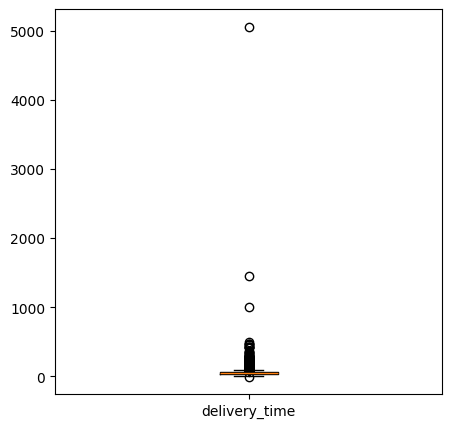

In [30]:
plt.figure(figsize=(5, 5))
plt.boxplot(df['delivery_time'], labels=['delivery_time'])

In [31]:
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

In [32]:
dfOut = df[((df['delivery_time'] < (Q1 - 1.5 * IQR)) | (df['delivery_time'] > (Q3 + 1.5 * IQR)))]
print(f'% Outliers: {np.round(100*(len(dfOut)/len(df)),2)} %')

% Outliers: 1.0 %


<ipython-input-33-0010baca915c>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dfWithoutOut['delivery_time'], labels=['delivery_time'])


{'whiskers': [<matplotlib.lines.Line2D at 0x78afebb70750>,
 'caps': [<matplotlib.lines.Line2D at 0x78afebb71850>,
 'boxes': [<matplotlib.lines.Line2D at 0x78aff81c7b10>],
 'medians': [<matplotlib.lines.Line2D at 0x78afebb72c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x78afebb73550>],
 'means': []}

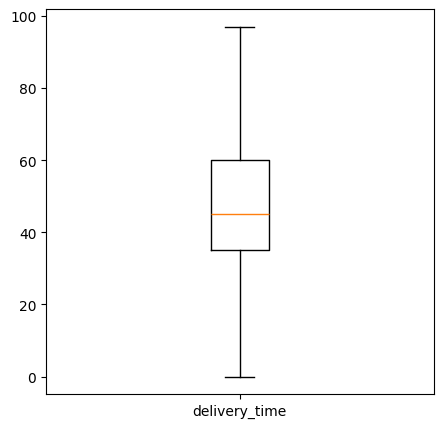

In [33]:
dfWithoutOut = df[~((df['delivery_time'] < (Q1 - 1.5 * IQR)) | (df['delivery_time'] > (Q3 + 1.5 * IQR)))]
plt.figure(figsize=(5, 5))
plt.boxplot(dfWithoutOut['delivery_time'], labels=['delivery_time'])

# Exercises

1. Weighted Average

In [34]:
grades = [8.5, 7]
weights = [0.6, 0.4]

In [35]:
def weightedAverage(grades, weights):
  sumWeighted = np.multiply(grades, weights).sum()
  sumWeights = np.sum(weights)
  return sumWeighted / sumWeights

In [36]:
weightedAverage(grades, weights)

np.float64(7.9)

2. Mean and Median treaating 'None' with mean

In [37]:
salary = [3500, 4000, None, 5000, 3000, 4500, None, 4800]

In [38]:
salaryWithoutNone = [x for x in salary if x is not None]
meanSalary = float(np.mean(salaryWithoutNone))
salaryTreated = [x if x is not None else meanSalary for x in salary]
salaryTreated

[3500, 4000, 4133.333333333333, 5000, 3000, 4500, 4133.333333333333, 4800]

In [39]:
print('Mean: ', np.mean(salaryTreated))
print('Median: ', np.median(salaryTreated))

Mean:  4133.333333333333
Median:  4133.333333333333


3. Variance and STD for the ages

In [40]:
ages = [22, 25, 23, 20, 24]

In [41]:
variance = np.var(ages)
std = np.std(ages)
print('Variance: ', variance)
print('STD: ', std)

Variance:  2.96
STD:  1.7204650534085253


4. Compare Variance and STD for 2 groups

In [42]:
A = [4, 7, 6, 8, 5]
B = [3, 9, 7, 8, 4]

In [43]:
AVariance = np.var(A)
BVariance = np.var(B)
ASTD = np.std(A)
BSTD = np.std(B)

if AVariance > BVariance:
  print('A has bigger variance')
else:
  print('B has bigger variance')

if ASTD > BSTD:
  print('A has bigger STD')
else:
  print('B has bigger STD')

print('Variance A: ', AVariance)
print('Variance B: ', BVariance)
print('STD A: ', ASTD)
print('STD B: ', BSTD)

B has bigger variance
B has bigger STD
Variance A:  2.0
Variance B:  5.36
STD A:  1.4142135623730951
STD B:  2.3151673805580453
